In [21]:
import os
from keras.utils import get_file
import gensim
import subprocess
import numpy as np
import matplotlib.pyplot as plt


from sklearn.manifold import TSNE
import json
from collections import Counter
from itertools import chain

In [2]:
model_path = "../GoogleNews-vectors-negative300.bin.gz"
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

/Applications/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


##### model.most_similar(positive=['king'])

In [7]:
def A_is_to_B_as_C_is_to(a, b, c, topn=1):
    a,b,c = map(lambda x: x if type(x) == list else [x], (a, b, c))
    res = model.most_similar(positive=b +c, negative=a, topn=topn)
#     import pdb; pdb.set_trace()
    if len(res):
        if topn == 1:
            return res[0][0]
        return [x[0] for x in res]
    return None

A_is_to_B_as_C_is_to('man', 'woman', 'king')

'queen'

In [8]:
for country in "Italy", "France", "India", "China", "Pakistan":
    print('%s is the capital of %s' %
         (A_is_to_B_as_C_is_to('Germany', 'Berlin', country), country))

Rome is the capital of Italy
Paris is the capital of France
Delhi is the capital of India
Beijing is the capital of China
Islamabad is the capital of Pakistan


In [9]:
for company in 'Google', 'IBM', 'Boeing', 'Microsoft', 'Nokia', 'Samsung':
    products = A_is_to_B_as_C_is_to(['Starbucks', 'Apple'], ['Starbucks_coffee', 'iPhone'], company, topn=4)
    print('%s -> %s' % (company, ', '.join(products))) 

Google -> personalized_homepage, app, Gmail, Google_Instant_Previews
IBM -> DB2, WebSphere_Portal, Tamino_XML_Server, CloudBurst
Boeing -> Dreamliner, airframe, aircraft, Dreamliner_jets
Microsoft -> Windows_Mobile, SyncMate, Windows, software
Nokia -> Nokia_N##, handset, Motorola_C###, handsets
Samsung -> MM_A###, handset, Samsung_SCH_B###, Nokia_N##


In [12]:
beverages = ['espresso', 'beer', 'vodka', 'wine', 'cola', 'tea']
countries = ['Italy', 'Germany', 'Russia', 'France', 'USA', 'India']
sports = ['soccer', 'handball', 'hockey', 'cycling', 'basketball', 'cricket', 'kabaddi']

items = beverages + countries + sports

In [15]:
item_vectors = [(item, model[item])
                for item in items
                if item in model]
len(item_vectors)

19

# TNSE for Clustering

In [18]:
vectors = np.asarray([x[1] for x in item_vectors])
lengths = np.linalg.norm(vectors, axis=1)
import pdb; pdb.set_trace()
norm_vectors = (vectors.T / lengths).T

tsne = TSNE(n_components=2, perplexity=10, verbose=2).fit_transform(norm_vectors)

--Return--
> <ipython-input-18-72da5575e13c>(3)<module>()->None
-> import pdb; pdb.set_trace()
(Pdb) vectors
array([[-0.19628906, -0.38476562, -0.15820312, ...,  0.09130859,
         0.14355469,  0.39648438],
       [-0.08740234, -0.13378906, -0.04492188, ..., -0.07421875,
         0.20410156, -0.12011719],
       [-0.05834961, -0.15429688, -0.04882812, ...,  0.21972656,
         0.14453125,  0.04614258],
       ...,
       [-0.00854492,  0.08447266,  0.21289062, ...,  0.22167969,
         0.04663086,  0.25976562],
       [-0.3671875 , -0.12158203,  0.28515625, ...,  0.24902344,
        -0.14257812,  0.04150391],
       [-0.37890625,  0.14453125,  0.57421875, ...,  0.23144531,
        -0.29882812,  0.27734375]], dtype=float32)
(Pdb) lengths
array([3.586366 , 3.135164 , 3.3712635, 3.2634988, 3.0897832, 3.3310723,
       2.797517 , 2.658717 , 2.896993 , 2.716706 , 2.4355297, 2.6760032,
       3.0090933, 3.7031436, 3.3725905, 3.1958177, 3.077873 , 3.6725526,
       4.3611364], dtype=float

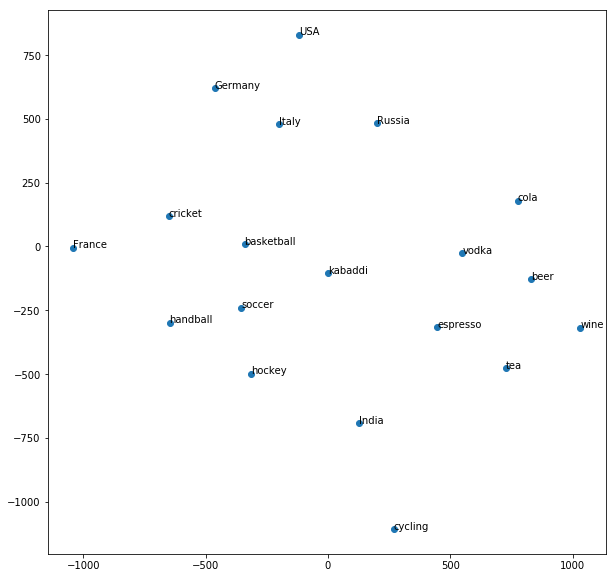

In [32]:
x = tsne[:,0]
y = tsne[:,1]
from IPython.core.pylabtools import figsize
figsize(10,10)
fig, ax = plt.subplots()
ax.scatter(x, y)
for item, x1, y1 in zip(item_vectors, x, y):
    ax.annotate(item[0], (x1, y1), clip_on=True)
plt.show()